**Import Libraries**

In [63]:
#Importing libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

In [65]:
print('TensorFlow Version: ', tf.__version__)

TensorFlow Version:  2.7.0


**Importing Data**

In [66]:
# Loading the data
from google.colab import drive
MOUNT= '/content/drive/'

In [67]:
import h5py
h5f=h5py.File('/content/drive/MyDrive/Colab Notebooks/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')

X_train, y_train = h5f['X_train'][:], h5f['y_train'][:]
X_test, y_test  = h5f['X_test'][:], h5f['y_test'][:]

h5f.close()

**Data Exploration**

In [68]:
print(f"No. of image samples in Train set: {len(X_train)}")
print(f"No. of image samples in Test set: {len(X_test)}")

No. of image samples in Train set: 42000
No. of image samples in Test set: 18000


In [69]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of X_test: {y_test.shape}")

Shape of X_train: (42000, 32, 32)
Shape of y_train: (42000,)
Shape of X_test: (18000, 32, 32)
Shape of X_test: (18000,)


**Visualization**

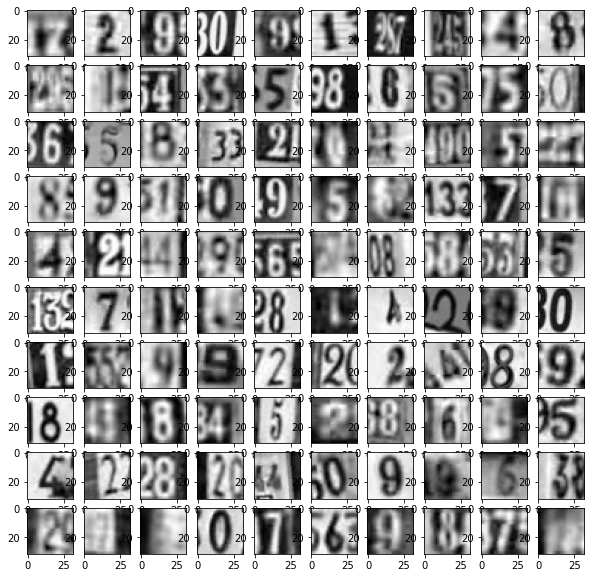

In [70]:
fig = plt.figure(figsize = (10, 10))
columns = 10
rows = 10
for i in range(1, columns * rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = 'gray')
plt.show()

Label: 6


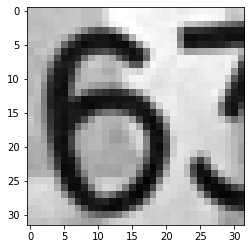

In [71]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap='gray')

print(f"Label: {y_train[1]}")

**one-hot encode our class labels for to use softmax function**

In [72]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f"Label value after encoding: {y_train[1]}")

Label value after encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Model Structure**

**Input layer:** We will reshape our input from 32x32 (2D) to 1024 (1D). Hence, our input layer will have 1024 neurons

**Batch Normalization Layer :** This layer normalizes the value at each image pixel wrt a particular batch. Hence in a batch, the values will be normally distributed

**Hidden layer 1**: This is our 1st hidden layer with 'ReLU' activation. It will have 400 neurons

**Hidden layer 2:** This is our 2nd hidden layer with 'ReLU' activation. It will have 250 neurons

**Dropout layer 1:** This is our 1st dropout layer which is introduced to reduce overfitting and bring in some regularization. We will start with dropout rate of 0.5

**Hidden layer 3:** This is our 3rd hidden layer with 'ReLU' activation. It will have 150 neurons

**Hidden layer 4:** This is our 4th hidden layer with 'ReLU' activation. It will have 100 neurons

**Dropout layer 2:** This is our 2nd dropout layer which is introduced to further reduce overfitting and bring in some regularization. We will use dropout rate of 0.5

**Hidden layer 5:** This is our 5th hidden layer with 'ReLU' activation. It will have 60 neurons

**Hidden layer 6:** This is our 6th hidden layer with 'ReLU' activation. It will have 30 neurons

**Dropout layer 3**: This is our 3rd dropout layer which is introduced to further reduce overfitting and bring in some regularization. We will use dropout rate of 0.3

**Output layer:** This is our output layer which will have 10 neurons (one each for a class label) and will have softmax activation which will give us class probabilities

We will use adam optimizer with Cross Entropy for loss function. We will use Accuracy to measure model performance

**Model Building**

In [73]:
# Fix the seed for random number generator
import random
random.seed(42)

In [74]:
from tensorflow import keras

# Initialize Sequential model
nn_model = keras.models.Sequential(name='ANN')

# Input layer: Reshape data from 2D to 1D -> 32x32 to 1024
nn_model.add(keras.layers.Reshape((1024,),input_shape=(32,32,), name='Input_Layer'))

# Batch normalization layer
nn_model.add(keras.layers.BatchNormalization(name='Batch_Normalization_Layer'))

# Hidden layers 1 and 2
nn_model.add(keras.layers.Dense(400, activation='relu', name='Hidden_Layer_1'))
nn_model.add(keras.layers.Dense(250, activation='relu', name='Hidden_Layer_2'))

# Dropout layer 1
nn_model.add(keras.layers.Dropout(0.5, name='Dropout_Layer_1'))

# Hidden layers 3 and 4
nn_model.add(keras.layers.Dense(150, activation='relu', name='Hidden_Layer_3'))
nn_model.add(keras.layers.Dense(100, activation='relu', name='Hidden_Layer_4'))

# Dropout layer 2
nn_model.add(keras.layers.Dropout(0.5, name='Dropout_Layer_2'))

# Hidden layers 5 and 6
nn_model.add(keras.layers.Dense(60, activation='relu', name='Hidden_Layer_5'))
nn_model.add(keras.layers.Dense(30, activation='relu', name='Hidden_Layer_6'))

# Dropout layer 3
nn_model.add(keras.layers.Dropout(0.3, name='Dropout_Layer_3'))

#Output layer
nn_model.add(keras.layers.Dense(10, activation='softmax', name='Output_Layer'))


In [75]:
# Specify optimizer, loss function and evaluation metrics for the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
# Print the model Summary
nn_model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Reshape)       (None, 1024)              0         
                                                                 
 Batch_Normalization_Layer (  (None, 1024)             4096      
 BatchNormalization)                                             
                                                                 
 Hidden_Layer_1 (Dense)      (None, 400)               410000    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 250)               100250    
                                                                 
 Dropout_Layer_1 (Dropout)   (None, 250)               0         
                                                                 
 Hidden_Layer_3 (Dense)      (None, 150)               37650     
                                                               

**Train model with 100 Epochs**

In [77]:
nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 500)

Epoch 1/100
84/84 [==============================] - 5s 55ms/step - loss: 2.3179 - accuracy: 0.0999 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/100
84/84 [==============================] - 4s 52ms/step - loss: 2.3016 - accuracy: 0.1074 - val_loss: 2.2806 - val_accuracy: 0.1243
Epoch 3/100
84/84 [==============================] - 4s 52ms/step - loss: 2.1926 - accuracy: 0.1586 - val_loss: 1.9700 - val_accuracy: 0.2366
Epoch 4/100
84/84 [==============================] - 4s 52ms/step - loss: 1.9532 - accuracy: 0.2631 - val_loss: 1.6822 - val_accuracy: 0.4142
Epoch 5/100
84/84 [==============================] - 4s 52ms/step - loss: 1.7227 - accuracy: 0.3639 - val_loss: 1.4233 - val_accuracy: 0.4959
Epoch 6/100
84/84 [==============================] - 4s 52ms/step - loss: 1.5279 - accuracy: 0.4445 - val_loss: 1.2475 - val_accuracy: 0.5627
Epoch 7/100
84/84 [==============================] - 4s 53ms/step - loss: 1.3567 - accuracy: 0.5136 - val_loss: 1.0979 - val_accuracy: 0.6196
Epoch 

**Model Evaluation**

In [78]:
 # Check accuracy on test set
 nn_model.evaluate(X_test, y_test)

563/563 [==============================] - 2s 4ms/step - loss: 0.5689 - accuracy: 0.8629


[0.5688843131065369, 0.8629444241523743]

In [82]:
y_pred = nn_model.predict(X_test)
y_pred

array([[1.81618422e-01, 5.88574894e-02, 5.65261468e-02, ...,
        4.03292291e-02, 1.58535704e-01, 1.02069408e-01],
       [1.87342266e-05, 5.65045560e-03, 7.43786368e-05, ...,
        9.94145513e-01, 1.05017753e-05, 3.94801418e-06],
       [7.42786908e-14, 2.22988911e-14, 9.99999046e-01, ...,
        2.07033213e-09, 4.27315854e-08, 1.41386778e-07],
       ...,
       [2.22433058e-10, 4.02367550e-05, 4.85696705e-10, ...,
        9.99959707e-01, 4.51233530e-11, 4.57140445e-12],
       [2.78032478e-03, 9.34271611e-07, 1.75284822e-05, ...,
        1.75615440e-07, 6.82973594e-04, 9.96185482e-01],
       [3.15986161e-11, 1.28954313e-11, 9.99982953e-01, ...,
        1.08602435e-07, 1.31175511e-06, 2.86670002e-06]], dtype=float32)

In [80]:
# ROC Score
from sklearn.metrics import roc_auc_score

In [81]:
print(roc_auc_score(y_test, y_pred))

0.9840305077457192


Our model has ROC score of 0.98 and we are able to achieve an accuracy of 87% on the test set